In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("urban_air_quality.csv")

In [3]:
data.head()

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),O3 (µg/m³),Temperature (°C),Humidity (%),Wind Speed (m/s),AQI Label
0,112,189,130,46,1.51,103,18.5,25,1.4,Unhealthy for Sensitive Groups
1,280,412,143,33,0.63,127,23.9,23,2.3,Very Unhealthy
2,116,453,104,30,3.29,90,23.2,48,4.5,Unhealthy for Sensitive Groups
3,81,302,81,4,3.85,118,16.6,78,1.4,Moderate
4,198,141,7,41,4.64,60,21.9,36,2.8,Unhealthy


In [4]:
import seaborn as sns


<Axes: >

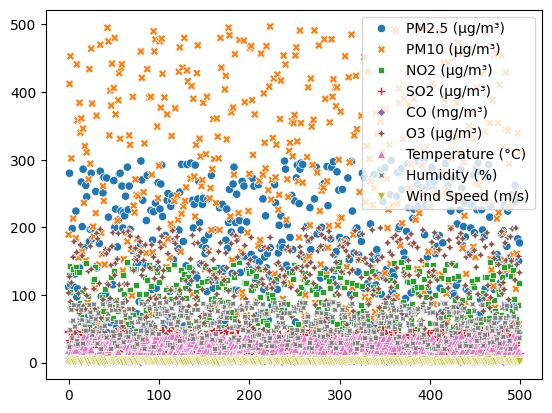

In [5]:
sns.scatterplot(data)

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
y=data['AQI Label']

In [16]:
data['AQI Label'].unique()

array(['Unhealthy for Sensitive Groups', 'Very Unhealthy', 'Moderate',
       'Unhealthy', 'Good'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['AQI Label_Encoded'] = le.fit_transform(data['AQI Label'])

print(data[['AQI Label', 'AQI Label_Encoded']])

                          AQI Label  AQI Label_Encoded
0    Unhealthy for Sensitive Groups                  3
1                    Very Unhealthy                  4
2    Unhealthy for Sensitive Groups                  3
3                          Moderate                  1
4                         Unhealthy                  2
..                              ...                ...
495                  Very Unhealthy                  4
496                            Good                  0
497                       Unhealthy                  2
498  Unhealthy for Sensitive Groups                  3
499                       Unhealthy                  2

[500 rows x 2 columns]


In [22]:
data.drop(['AQI Label'],axis=1, inplace=True)

In [23]:
data.head()

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),O3 (µg/m³),Temperature (°C),Humidity (%),Wind Speed (m/s),AQI Label_Encoded
0,112,189,130,46,1.51,103,18.5,25,1.4,3
1,280,412,143,33,0.63,127,23.9,23,2.3,4
2,116,453,104,30,3.29,90,23.2,48,4.5,3
3,81,302,81,4,3.85,118,16.6,78,1.4,1
4,198,141,7,41,4.64,60,21.9,36,2.8,2


In [24]:
x= data[['PM2.5 (µg/m³)',	'PM10 (µg/m³)',	'NO2 (µg/m³)',	'SO2 (µg/m³)',	'CO (mg/m³)',	'O3 (µg/m³)',	'Temperature (°C)',	'Humidity (%)',	'Wind Speed (m/s)']]

In [27]:
y=data['AQI Label_Encoded']

In [28]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
model.score(X_train,y_train)*100

99.94732202834439

In [36]:
model.score(X_test,y_test)*100

99.89238473681345

In [37]:
model.predict([[112,189,130,46,1.51,103,18.5,25,1.4	]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.])